# Classification algorithms

The objectives of this notebook are to learn and compare the basic model families in shallow machine learning classication problems.

We'll look at the following types of models: 

* Logistic regression,

* Nearest neighbours models, 
    
* Support vector machines,
    
* Decision Trees, and Ensemble models.
    
* Neural Networks (very briefly)

For each model, we will:

* Describe the key hyperparameters that control how these models learn.

* Visualize decision boundaries study how models make predictions.

* Discuss the properties of an appropriate predictive model.


## The dataset

First we'll import some data. I'm using an extract from the Rock Property Catalog, https://subsurfwiki.org/wiki/Rock_Property_Catalog

In [1]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/RPC_4_lithologies_original.csv')
df.describe()

,RPC,Vp [m/s],Vs [m/s],Rho [g/cm³]
count,800.000000,800.000000,800.000000,752.000000
mean,102276.178750,3798.453532,2113.480238,2.316455
std,1537.850865,1114.387572,750.387638,0.255653
min,100031.000000,1490.711927,441.270000,1.750000
25%,101112.750000,3010.248889,1520.975000,2.117000
50%,102081.500000,3675.150000,2198.100000,2.390000
75%,103284.750000,4664.592178,2733.805000,2.530000
max,105090.000000,5993.000000,3665.000000,2.780000


We are going to drop the rows with missing values

In [2]:
df.dropna(inplace=True)

### EXERCISE

Remove the units e.g. `[m/s]`, from any column names with units so we only need to refer to a column using its abbreviation

In [3]:
new_names = {'Vp [m/s]': 'Vp', 'Vs [m/s]': 'Vs', 'Rho [g/cm³]': 'Rho'}
df = df.rename(new_names, axis='columns')

We'll start our discussion of classification by using the logistic regression algorithm one a variable and two classes.

## Logistic regression

Logistic regression is similar to linear regression, but instead of predicting a continuous variable, it predicts whether something is true or false. It is a classification algorithm. 

Instead of fitting a line to the data, Logistic regression fits a logistic function (a.k.a sigmoid) to the data. The model then is a probability function used to classify new data.

$$f(x) = \frac{1}{1+e^{-(\textbf{wx}+b)}}$$

It has many uses in data analysis and machine learning, especially in data transformations. The curve goes from zero to one. It tells you the probability that a sample is a class of interest or not. Instead of using a least-squares type loss function, it uses a maximum likelihood function.

### EXERCISE

- Write a function called `logistic` that takes x, w, and b as arguments and returns the value of the logistic.

- Make a plot of the logistic function from x = -10 to 10.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, w=1, b=0):
    
    # Your code goes here
    
    return 

In [5]:
# Your code goes here. 


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, w=1, b=0):
    """Logistic function.
    Args:
        x (array or int): input
        w (float or array): the weights of the logistic
        b (float): the intercept (or bias)
    """
    term = np.exp(-(w * x + b))
    return 1 / (1 + term)

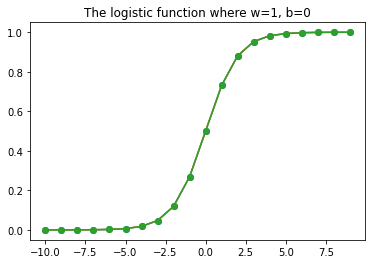

In [7]:
x = np.arange(-10, 10)
plt.plot(x, sigmoid(x), 'o-')
plt.title('The logistic function where w=1, b=0')

# Note, we can use the expit function in scipy for this
from scipy.special import expit
y = expit(x)
plt.plot(x, y)
plt.plot(x, sigmoid(x), 'o-')

## Make X and y

In [8]:
features = ['Vp']  # A 1-D feature space.
classes = ['shale', 'dolomite']  # Two classes.
df_LR = df.loc[df['Lithology'].isin(classes)]

X = df_LR[features].values
y = df_LR['Lithology'].values

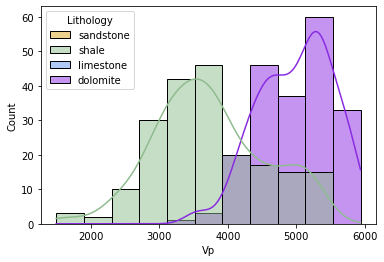

In [9]:
import seaborn as sns

# Create a custom color palette for seaborn.
colors = ['goldenrod', 'darkseagreen', 'cornflowerblue', 'blueviolet']
palette = sns.color_palette(colors)
hue_order = df['Lithology'].unique()

_ = sns.histplot(data=df_LR, x='Vp', kde=True, hue='Lithology', palette=palette, hue_order=hue_order)

In [10]:
import sklearn 

print(sklearn.__version__)

# Make sure we can see all of the model details.
sklearn.set_config(print_changed_only=False)

1.0.2


In [11]:
from sklearn.model_selection import train_test_split

X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X, y, test_size=0.2, random_state=32)

X_train_lr.shape, X_val_lr.shape

((320, 1), (80, 1))

## Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()

model.fit(X_train_lr, y_train_lr)

y_pred_lr = model.predict(X_val_lr)

We can now use `model.predict()` to perform our classifications, but if we choose we can also take it's learned coefficients to studied the logistic curve that we fitted to the data. The sigmoid alone, however does not provide the classification directly, but it's illustrative to inspect it relative to the data points

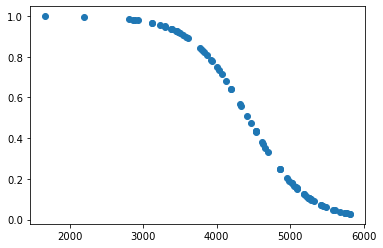

In [13]:
# Create our own logistic function from the learned model parameters.
y_test_lr = sigmoid(X_val_lr * model.coef_ + model.intercept_).ravel()
plt.scatter(X_val_lr, y_test_lr)

In [14]:
from ipywidgets import interact
from mlutils import logistic_progression

@interact(cutoff=np.arange(0, 1.0, 0.05))
def logistic_regression_plot(cutoff=0.5):
    logistic_progression(model, X_val_lr, y_val_lr, y_test_lr, cutoff)

interactive(children=(Dropdown(description='cutoff', index=10, options=(0.0, 0.05, 0.1, 0.15000000000000002, 0…

## More features and more classes

## Make X and y

In [15]:
features = ['Vp', 'Rho']  # A 2-D feature space. 
X = df[features].values  # Including all four classes.
y = df['Lithology']

## Split the data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

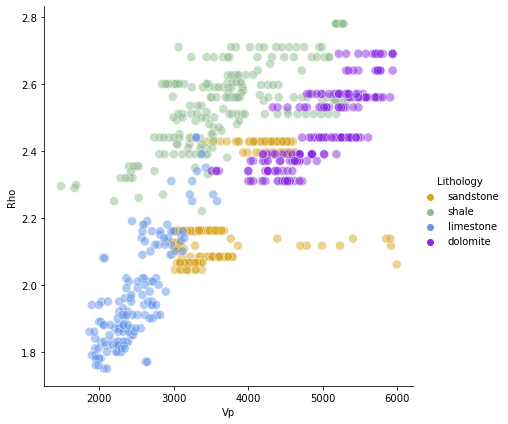

In [18]:
# Make a scatter plot.
scatter = sns.relplot(data=df, x='Vp', y='Rho', hue='Lithology', s=80, alpha=0.5, height=6, 
                      palette=palette, hue_order=hue_order)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

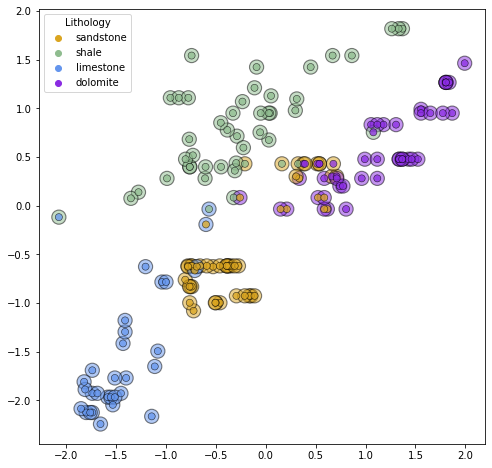

In [20]:
from mlutils import val_vs_pred_scatter

val_vs_pred_scatter(X_val, y_val, y_pred, palette, hue_order)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.8344370860927153

## Plotting the decision regions

The cutoff we say in one-dimension is expressed as decision boundaries in 2D. We can visualize these decision regions:

Accuracy: 0.834


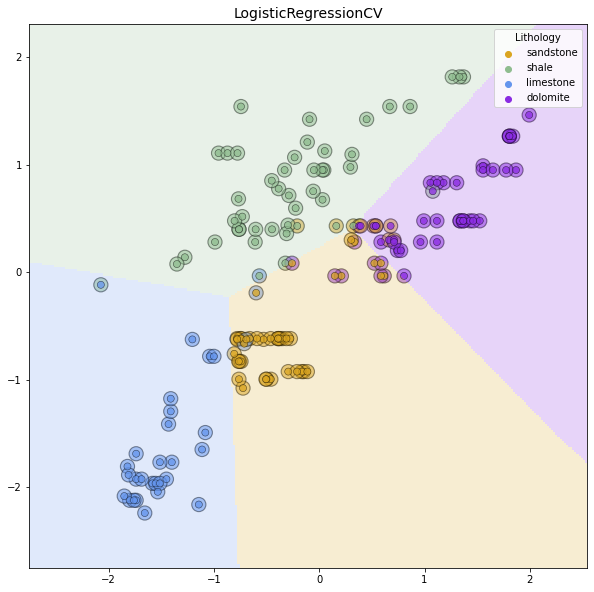

In [22]:
from mlutils import show_decision_regions

show_decision_regions(model, X_train, y_train, X_val, y_val, palette, hue_order)

## kNN 

K-Nearest neighbours (kNN) is a supervised learning algorithm that tries to classify a test point by calculating the probability of each of the classes within the `k` closest datapoints. For each test data point, this is done by calculating the distance between the test point and all the training points. The `k` closest points (neighbors) are selected and are their classes are counted as votes to make a class prediction.


In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)  # the default it 5

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

0.9536423841059603

What about some different values of k?

In [24]:
from ipywidgets import interact

@interact(n=[1, 3, 5, 10, 20, 30, 50, 100, 150])
def decision_boundaries(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

interactive(children=(Dropdown(description='n', options=(1, 3, 5, 10, 20, 30, 50, 100, 150), value=1), Output(…

### EXERCISE:

- Why is kNN called a non-parameteric classifier?
- Do high or low values if `n` create a smoothing effect?
- What value of `n_neighbors` gives the highest accuracy?
- How many times is shale being "confused" as sandstone?

## Support-vector machine (SVM)

The objective of the support vector machine alogorithm is to find a **hyperplane** that distinctly separates the classes in the feature space. 

So, for a one-dimensional feature space, a hyperplane is a dot. In a two-dimesional feature space, a hyperplane is a line. In a three-dimensional feature space a hyperplane is a plane. In higher-dimensional space a hyperplane is still simply called a hyperplane.

The support vectors are data points that are closest to the hyperplanes and influence the position and orientation of the decision boundary. If you delete a support vector, you will move the decision boundary. If you remove any point that isn't a support vector you will not change the boundary. 

## Linear SVM

### Hard margin

If the training data is linearly seperable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the decision boundary is defined to be the hyperplane that lies halfway in between.

$${\displaystyle \mathbf {w} ^{T}\mathbf {x} -b=0}$$

### Soft margin

In the cases where the data are not linearly seperable, the [hinge loss](https://en.wikipedia.org/wiki/Hinge_loss) function is minimized to find the margin

$${\displaystyle \lambda \lVert \mathbf {w} \rVert ^{2}+\left[{\frac {1}{n}}\sum _{i=1}^{n}\max \left(0,1-y_{i}(\mathbf {w} ^{T}\mathbf {x} _{i}-b)\right)\right],}$$

where the parameter $\lambda >0$ determines the trade off between increasing the margin and ensuring that all points are on their correct side of the margin. For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.

In [25]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)

accuracy_score(y_val, y_pred)

0.8543046357615894

In [26]:
@interact(C=[0.005, 0.05, 0.1, 0.5, 1.0, 10, 100])
def decision_boundaries(C=1):
    clf = SVC(kernel='linear', C=C)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

interactive(children=(Dropdown(description='C', index=4, options=(0.005, 0.05, 0.1, 0.5, 1.0, 10, 100), value=…

## Non-linear SVM 

If we are not satified with this linear classification in 2-D space. We may map our data onto higher-dimensional spaces, presumably making it easier to find a hyperplane to separate our classes. 

But, instead of explicitly mapping our data points into a potentially huge and costly number of dimensions, non-linear SVM classifiers employ the so called **kernel trick** which applies nonlinear functions between points, instead of simple distances. 

The `rbf` (radial basis function) kernel, which is what Scikit-learn uses by default, applies a gaussian function, for instance.

The key hyperparamters to consider when training with the `rbf` kernel is `C` and `gamma`:

* `C` trades off missclassification of the training data against the simpliciity of the surface. A low `C` makes a smooth surface, a high `C` aims at classifying more point correctly (but results in a more complicated surface). 

* `gamma` defines how far the influence of a single training example has. Low values of `gamma` mean 'far', and high values mean 'close'. The `gamma` parameter can be seen as the inverse of the radius of influence of samples selected by the model as support vectors

Here's an [example](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py) in the Scikit-learn documentation comparing these two hyperparameters;

In [27]:
from sklearn.svm import SVC

svc = SVC(C=1)  # The default kernel is 'rbf' (which is a non-linear one).

svc.fit(X_val, y_val)

y_pred = svc.predict(X_val)

accuracy_score(y_val, y_pred)

0.8675496688741722

In [28]:
@interact(C=[0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 1e4, 1e8])
def decision_boundaries(C=1):
    clf = SVC(kernel='rbf', C=C, gamma=0.01)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

interactive(children=(Dropdown(description='C', index=3, options=(0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000.…

### EXERCISE:

- Do SVMs have to have their features standardized?
- What values of C give the highest accuracy?
- What value(s) of C appears to yield an appropriate model?
- Trying adding `gamma` to the classifer. Try values of `0.1, 1, 10, 100`. Discuss in terms of model complexity.

## Decision trees

[Decision trees](https://scikit-learn.org/stable/modules/tree.html) are a supervised learning method whereby the goal is to predict the class of a target variable by learning simple decision rules inferred from the data features. 

The structure of a decision is a set of `if-then-else` rules. Each decision asks an `if` statement of one and only one of the features at a time. The deeper the tree, the more complex the decision rules become and the fitter the model. If decision trees are too deep, they are prone to overfitting the training data.

One recourse against overfitting is to limit the `max_depth` of the tree. The `max_depth` is maximum the number of `if` statements a data point will be asked. Another way to avoid overfitting is to increase the `min_samples_leaf`, minimum samples per leaf, to ensure that multiple samples will inform every decision in the tree. A decision that is informed by a very small number training points is not a decision fit for general purpose (overfit). 

Try `min_samples_leaf` greater than or equal to 5. Try `max_depth`= 3, see how it fits the data, and then increase from there.


In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

0.8344370860927153

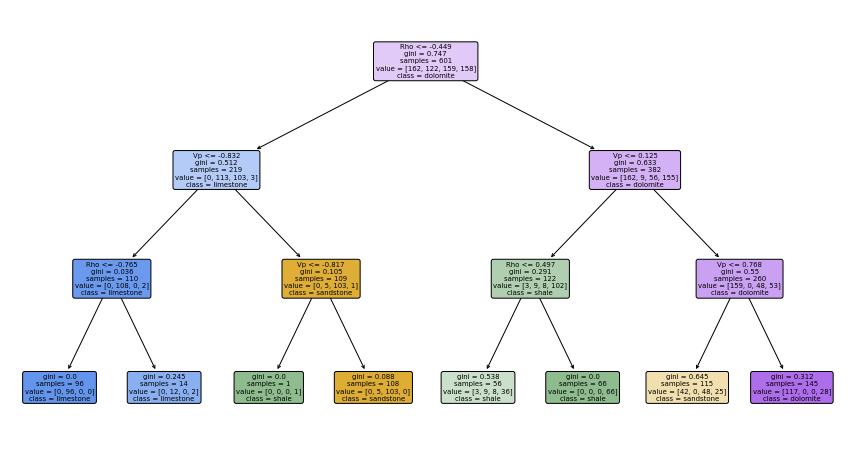

In [30]:
from mlutils import lithology_tree

lithology_tree(clf, features)

In [44]:
@interact(max_depth=[2, 3, 4, 5, 6, 7, 8, 9, 10])
def decision_boundaries(max_depth=3):
    clf = DecisionTreeClassifier(max_depth=100, min_samples_leaf=2)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

interactive(children=(Dropdown(description='max_depth', index=1, options=(2, 3, 4, 5, 6, 7, 8, 9, 10), value=3…

### EXERCISE

- What is the default value of `min_samples_leaf`?
- Increase this value and notice the effect at different values of `max_depth`
- Can you configure the combination of these two hyperparameters to find the highest accuracy score?


## Random forests and ensemble methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3).fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
@interact(max_depth=np.arange(2, 10), min_samps_leaf=np.arange(1,6))
def decision_boundaries(max_depth=3, min_samps_leaf=3):
    clf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samps_leaf)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

## Boosted trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

clf = GradientBoostingClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
@interact(max_depth=np.arange(2, 10), min_samps_leaf=np.arange(1,6))
def decision_boundaries(max_depth=3, min_samps_leaf=3):
    clf = GradientBoostingClassifier(max_depth=max_depth, min_samples_leaf=min_samps_leaf)
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

## Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[10, 10],
                    learning_rate='constant',
                    alpha=0.001,
                    max_iter=5000,
                    solver='adam',
                    random_state=42,
                   )

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy_score(y_val, y_pred)

In [ ]:
@interact(hl1=np.arange(2, 15, 1))
def decision_boundaries(hl1=3):
    clf = MLPClassifier(hidden_layer_sizes=[hl1],
                    learning_rate='constant',
                    alpha=0.001,
                    max_iter=5000,
                    solver='adam',
                    random_state=42,
                   )
    show_decision_regions(clf, X_train, y_train, X_val, y_val, palette, hue_order)

---

## Choosing the right estimator

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

This is a good place to start ([here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) is a clickable version):

<img src="https://scikit-learn.org/stable/_static/ml_map.png"></img>

---

Different estimators are better suited for different types of data and different problems. For a classifier comparison (below) check the source code [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png"></img>

###  [Check out this paper with a comparison of many classifiers](https://arxiv.org/abs/1708.05070)

## Summary

- Choosing a model mean you are making an interpretation.
- You need to know the key hyperparameters that effect how models learn.
- KNN and SVM models have few hyperparameters.
- Decision Trees and Neural Networks have more hyperparameters so they can be harder to "tune"
- All models can be underfit and overfit to your data.

## Next steps

- Try some of the other classifiers that we didn't feature here.
- Try different training and testing set sizes.
- Swap in your own data set.
- Beyond accuracy - Classification Reports, Confusion Matricies, ROC-AUC.
- Beyond the visual - tuning hyperparameters in a rigorous way. 